In [77]:
#importing the librarires.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
import pickle

In [3]:
bike=pd.read_csv(r"C:\Users\PRIYA\WINDOWS FILE\Desktop\DATASCIENCE\CASE STUDY\USED_BIKE_PRICE_PREDICTION\bike_data.csv")
bike.head()

,Unnamed: 0,Name,Price,Location,Running,Owner
0,0,TVS Star City Plus Dual Tone 110cc 2018,"35,000",Ahmedabad,"17,654 Km",First Owner
1,1,Royal Enfield Classic 350cc 2017,"1,19,900",Delhi,"11,000 Km",First Owner
2,2,Triumph Daytona 675R 2013,"6,00,000",Delhi,110 Km,First Owner
3,3,TVS Apache RTR 180cc 2017,"65,000",Bangalore,"16,329 Km",First Owner
4,4,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,"80,000",Bangalore,"10,000 Km",First Owner


As i can see i have a feature with unnamed and 3 features with categorical variable.

I have to bring that to numeric form of data.

In [4]:
#dropping the unnamed feature
bike.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
bike.head()

,Name,Price,Location,Running,Owner
0,TVS Star City Plus Dual Tone 110cc 2018,"35,000",Ahmedabad,"17,654 Km",First Owner
1,Royal Enfield Classic 350cc 2017,"1,19,900",Delhi,"11,000 Km",First Owner
2,Triumph Daytona 675R 2013,"6,00,000",Delhi,110 Km,First Owner
3,TVS Apache RTR 180cc 2017,"65,000",Bangalore,"16,329 Km",First Owner
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,"80,000",Bangalore,"10,000 Km",First Owner


In [6]:
bike.shape

(34500, 5)

In [7]:
#let's check data types
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34500 entries, 0 to 34499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      34500 non-null  object
 1   Price     34500 non-null  object
 2   Location  34492 non-null  object
 3   Running   34473 non-null  object
 4   Owner     32974 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB


In [8]:
bike.isnull().sum()

Name           0
Price          0
Location       8
Running       27
Owner       1526
dtype: int64

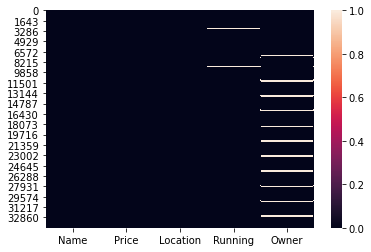

In [9]:
sns.heatmap(bike.isnull())

I can use dropna function to drop all the nan values , but that can remove useful information as well so imputation is required.

In [10]:
bike['Owner'].value_counts()

First Owner             30262
Second Owner             2586
Third Owner               110
Fourth Owner Or More       16
Name: Owner, dtype: int64

As i can see that First owner frequency is high let's go with First owner.

In [11]:
#let's start with the owner
bike['Owner']=bike['Owner'].fillna('First Owner')

In [12]:
#now the running feature.
bike.isnull().sum()

Name         0
Price        0
Location     8
Running     27
Owner        0
dtype: int64

In [13]:
bike.dropna(inplace=True)

As location and Running feature have few missing values i dropped it.

if we don't drop missing values , lambda function will not work ,it will throw error.

In [14]:
#The ',' symbol from price and running column
bike['Price']=bike['Price'].apply(lambda x: x.replace(',',''))
bike['Running']=bike['Running'].apply(lambda x: x.replace(',',''))

In [15]:
bike['Running']=bike['Running'].apply(lambda x: x.split(' ')[0])

now i can see a better table, or i can say clean table.

In [16]:
bike.head()

,Name,Price,Location,Running,Owner
0,TVS Star City Plus Dual Tone 110cc 2018,35000,Ahmedabad,17654,First Owner
1,Royal Enfield Classic 350cc 2017,119900,Delhi,11000,First Owner
2,Triumph Daytona 675R 2013,600000,Delhi,110,First Owner
3,TVS Apache RTR 180cc 2017,65000,Bangalore,16329,First Owner
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,80000,Bangalore,10000,First Owner


In [17]:
#now let's check for duplicate values
asd=bike[bike.duplicated()]

In [18]:
print(asd)

                                 Name   Price   Location Running        Owner
20           Bajaj Discover 125M 2014   29900      Delhi   20000  First Owner
21        Bajaj Pulsar RS200 ABS 2018  120000  Bangalore   23000  First Owner
22        Suzuki Gixxer SF 150cc 2016   48000     Mumbai   24725  First Owner
23      Aprilia Tuono V4 1100 RR 2018  500000    Chennai     100  First Owner
28            Bajaj Pulsar NS200 2017   78000  Bangalore    9900  First Owner
...                               ...     ...        ...     ...          ...
34495     Hero Passion Pro 100cc 2017   39000      Delhi   22000  First Owner
34496       TVS Apache RTR 180cc 2012   30000     Karnal    6639  First Owner
34497   Bajaj Avenger Street 220 2015   60000      Delhi   20373  First Owner
34498  Hero Super Splendor 125cc 2005   15600     Jaipur   84186  First Owner
34499         Bajaj Pulsar 150cc 2008   22000       Pune   60857  First Owner

[26682 rows x 5 columns]


In [19]:
bike.duplicated().sum()
bike.drop_duplicates() 

,Name,Price,Location,Running,Owner
0,TVS Star City Plus Dual Tone 110cc 2018,35000,Ahmedabad,17654,First Owner
1,Royal Enfield Classic 350cc 2017,119900,Delhi,11000,First Owner
2,Triumph Daytona 675R 2013,600000,Delhi,110,First Owner
3,TVS Apache RTR 180cc 2017,65000,Bangalore,16329,First Owner
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,80000,Bangalore,10000,First Owner
...,...,...,...,...,...
9989,Hero Hunk Rear Disc 150cc 2013,25000,Delhi,48587,First Owner
9996,Bajaj Avenger 220cc 2012,35000,Bangalore,60000,First Owner
9997,Harley-Davidson Street 750 ABS 2017,450000,Jodhpur,3430,First Owner
9998,Bajaj Dominar 400 ABS 2017,139000,Hyderabad,21300,First Owner


In [20]:
bike.shape

(34465, 5)

So from this i can say : this dataset has 35 records duplicated which affects the ml model, so directly delete it.

Also, i need to make a feature for cc for better understanding.

Also an important thing is : extraction of cc number from text input, for that one must understand regular expression and the video is available on youtube : https://www.youtube.com/watch?v=K8L6KVGG-7o

In [21]:
#creating a feature.
#Deriving Cubic Capacity from 'Name' column
bike['Cubic_Capacity']=bike.Name.str.extract(r'(\d\d\d)',expand=False)

In [22]:
#Checking all the unique values
bike['Cubic_Capacity'].unique()

array(['110', '350', '675', '180', '150', '160', '100', '500', '250',
       '200', '125', '302', '201', '220', '390', '600', '900', '650',
       '223', '410', '135', '765', '300', '129', '750', '400', '130',
       '821', '119', '883', '959', '295', '320', '310', '899', '535',
       '113', '120', '105', '800', '126', '170', '175', '797', '796',
       '149', '202', '109', '502', '107'], dtype=object)

In [23]:
bike['Year']=bike.Name.str.extract(r'(\d\d\d\d)',expand=False)
bike['Year'].unique()

array(['2018', '2017', '2013', '2015', '2014', '2016', '1100', '2019',
       '2005', '2008', '2012', '2011', '2007', '2009', '2010', '2020',
       '1299', '1300', '2006', '1198', '1982', '1800', '1130', '1000',
       '1200', '1050', '2004', '2003', '1991', '2002', '1262', '1998',
       '1700', '1980', '1994', '1984', '1997', '2001', '2000', '1978',
       '1600', '1983', '1958', '1090', '1943', '1987', '1990', '1999',
       '1995', '1996'], dtype=object)

In [24]:
bike.head()

,Name,Price,Location,Running,Owner,Cubic_Capacity,Year
0,TVS Star City Plus Dual Tone 110cc 2018,35000,Ahmedabad,17654,First Owner,110,2018
1,Royal Enfield Classic 350cc 2017,119900,Delhi,11000,First Owner,350,2017
2,Triumph Daytona 675R 2013,600000,Delhi,110,First Owner,675,2013
3,TVS Apache RTR 180cc 2017,65000,Bangalore,16329,First Owner,180,2017
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,80000,Bangalore,10000,First Owner,150,2018


In [25]:
#this is quite unique separation for me.
model=[]
for mod in bike.Name:
    
    name=mod.split(' ')
    if 'Honda' and 'CB' in mod:
        model.append(name[0]+' '+name[1]+' '+name[2])
    elif 'FZ' and '2.0' in mod:
         model.append(name[0]+' '+name[1]+' V 2.0')
    elif  'Triumph Street' in mod:
        model.append(name[0]+' '+name[1]+' '+name[2])
    elif 'BMW G 310' in mod:
        model.append(name[0]+' '+name[1]+' '+name[2]+' '+name[3])
    else:
        model.append(name[0]+' '+name[1])

In [26]:
#Adding our model list in the dataframe
bike['Model']=model

In [27]:
bike.head()

,Name,Price,Location,Running,Owner,Cubic_Capacity,Year,Model
0,TVS Star City Plus Dual Tone 110cc 2018,35000,Ahmedabad,17654,First Owner,110,2018,TVS Star
1,Royal Enfield Classic 350cc 2017,119900,Delhi,11000,First Owner,350,2017,Royal Enfield
2,Triumph Daytona 675R 2013,600000,Delhi,110,First Owner,675,2013,Triumph Daytona
3,TVS Apache RTR 180cc 2017,65000,Bangalore,16329,First Owner,180,2017,TVS Apache
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,80000,Bangalore,10000,First Owner,150,2018,Yamaha FZ V 2.0


In [28]:
len(bike['Model'].unique())

186

In [29]:
#deleting the Name feature
bike.drop(['Name'],axis=1,inplace=True)

In [30]:
#let's rearrange the feature name.
bike=bike[['Year','Model','Cubic_Capacity','Location','Running','Owner','Price']]

In [31]:
bike.rename(columns={'Cubic_Capacity':'cc'},inplace=True)
bike.rename(columns={'Running':'Running(km)'},inplace=True)

In [32]:
bike.head()

,Year,Model,cc,Location,Running(km),Owner,Price
0,2018,TVS Star,110,Ahmedabad,17654,First Owner,35000
1,2017,Royal Enfield,350,Delhi,11000,First Owner,119900
2,2013,Triumph Daytona,675,Delhi,110,First Owner,600000
3,2017,TVS Apache,180,Bangalore,16329,First Owner,65000
4,2018,Yamaha FZ V 2.0,150,Bangalore,10000,First Owner,80000


In [33]:
#bike1=bike
#bike1.to_csv('bike1with name.csv')

In [34]:
bike.dtypes

Year           object
Model          object
cc             object
Location       object
Running(km)    object
Owner          object
Price          object
dtype: object

converting objects datatype to integer data type whereever required.

In [35]:
bike['Year']=pd.to_numeric(bike['Year'])
bike['cc']=pd.to_numeric(bike['cc'])
bike['Running(km)']=pd.to_numeric(bike['Running(km)'])

In [36]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
#encoding the sex column
bike.iloc[:,1]=labelencoder.fit_transform(bike.iloc[:,1].values)
bike.iloc[:,3]=labelencoder.fit_transform(bike.iloc[:,3].values)
bike.iloc[:,5]=labelencoder.fit_transform(bike.iloc[:,5].values)

one hot encoder is a good technique ,but here values are too many and so i avoid that technique.

In [37]:
bike.head()

,Year,Model,cc,Location,Running(km),Owner,Price
0,2018,142,110,7,17654,0,35000
1,2017,118,350,126,11000,0,119900
2,2013,146,675,126,110,0,600000
3,2017,131,180,48,16329,0,65000
4,2018,156,150,48,10000,0,80000


In [38]:
bike.dtypes

Year            int64
Model           int32
cc              int64
Location        int32
Running(km)     int64
Owner           int32
Price          object
dtype: object

Price feature has trouble some values,if u see in excel one will find two price values for a particular row,we need to select only one value.

In [39]:
bike['Price']=bike['Price'].apply(lambda x: x.replace(',',''))

In [40]:
#So splitting the entry inorder to get single value
bike['Price']=bike['Price'].apply(lambda x: x.split("\n")[0])

In [41]:
bike['Price']=pd.to_numeric(bike['Price'])

In [42]:
bike.dtypes

Year           int64
Model          int32
cc             int64
Location       int32
Running(km)    int64
Owner          int32
Price          int64
dtype: object

In [43]:
#bike2=bike
#bike2.to_csv('bike2onlynumbers.csv')

The data set is ready let's do the model building

In [44]:
#creating object for dependent and independent variable.
X = bike[['Year','Model','cc','Location','Running(km)','Owner']]
Y=bike.Price

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

In [46]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(24125, 6) (24125,)
(10340, 6) (10340,)


Creating functions with many models.

In [47]:
def models(X_train,y_train):
    #random forest
    rf=RandomForestRegressor()
    rf.fit(X_train,y_train)
    
    #Xgboost
    xgb=xgboost.XGBRegressor()
    xgb.fit(X_train,y_train)
    
    #Gradient
    gradient= GradientBoostingRegressor()
    gradient.fit(X_train,y_train)
    
    #adaboost
    ada=AdaBoostRegressor()
    ada.fit(X_train,y_train)
    
    #print the training accuracy
    print("[1]randomforest training accuracy:",rf.score(X_train,y_train))
    print("[2]xgb training accuracy:",xgb.score(X_train,y_train))
    print("[3]gradient training accuracy:",gradient.score(X_train,y_train))
    print("[4]adaboost training accuracy:",ada.score(X_train,y_train))
    return rf,xgb,gradient,ada

if you face problem in installing any regressor do follow the documentation

In [48]:
#get and train all models
model=models(X_train,y_train)

[1]randomforest training accuracy: 0.9666719583002669
[2]xgb training accuracy: 0.9966700505966148
[3]gradient training accuracy: 0.8650235043623127
[4]adaboost training accuracy: 0.20368484950818766


As i can see with default parameters i can get accuracy for training set as 99% for one of the model which is quite good when compared to others.

So tuning is not required now.

In [49]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [50]:
y_predrf=rf.predict(X_test)

In [51]:
print(mean_absolute_error(y_test,y_predrf))
print(metrics.r2_score(y_test,y_predrf))

4233.435452911716
0.9220111635258822


In [55]:
#Xgboost
xgb=xgboost.XGBRegressor(max_depth=5)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
y_predxg=xgb.predict(X_test)

In [57]:
print(mean_absolute_error(y_test,y_predxg))
print(metrics.r2_score(y_test,y_predxg))

5236.395511897252
0.7938703154724347


From the above comparison i can say xgb gives good accuracy on training but on test data random forest gives better result.

Saving the file.

In [79]:
filename = 'second_hand_bike_price_prediction.pkl'
pickle.dump(rf, open(filename, 'wb'))